<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Assignment_7/Timeseries_Air_Quality_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# Load the dataset
raw_data = pd.read_csv('/content/AirQuality.csv', sep=None, engine='python', on_bad_lines='skip')

# Display the first few rows and basic info to analyze the raw structure
raw_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6","1,360.00",150.00,"11,9","1,046.00",166.00,"1,056.00",113.00,"1,692.00","1,268.00","13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,"1,292.00",112.00,"9,4",955.00,103.00,"1,174.00",92.00,"1,559.00",972.00,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2","1,402.00",88.00,"9,0",939.00,131.00,"1,140.00",114.00,"1,555.00","1,074.00","11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2","1,376.00",80.00,"9,2",948.00,172.00,"1,092.00",122.00,"1,584.00","1,203.00","11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6","1,272.00",51.00,"6,5",836.00,131.00,"1,205.00",116.00,"1,490.00","1,110.00","11,2","59,6","0,7888",NaN,NaN


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [7]:
# Drop unused columns
cleaned_data = raw_data.drop(columns=["Unnamed: 15", "Unnamed: 16"])

# Replace commas with periods and convert relevant columns to numeric
numeric_columns = [
    "CO(GT)", "C6H6(GT)", "T", "RH", "AH"
]
for col in numeric_columns:
    cleaned_data[col] = cleaned_data[col].str.replace(',', '.', regex=False).astype(float)

# Display the cleaned dataset's structure and preview the first few rows
cleaned_data.info(), cleaned_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


(None,
          Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
 0  10/03/2004  18.00.00    2.60     1,360.00    150.00     11.90   
 1  10/03/2004  19.00.00    2.00     1,292.00    112.00      9.40   
 2  10/03/2004  20.00.00    2.20     1,402.00     88.00      9.00   
 3  10/03/2004  21.00.00    2.20     1,376.00     80.00      9.20   
 4  10/03/2004  22.00.00    1.60     1,272.00     51.00      6.50   
 
    PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
 0       1,046.00   166.00      1,056.00   113.00      1,692.00     1,268.00   
 1         955.00   103.00      1,174.00    92.00      1,559.00       972.00   
 2         939.00   131.00      1,140.00   114.00      1,555.00     1,074.00   
 3         948.00   172.00      1,092.00   122.00      1,584.00     1,203.00   
 4         836.00   131.00      1,205.00   116.00      1,490.00     1,110.00   
 
       T    RH   AH  
 0 13.60 48.90 0.76  
 1 13.30 47.70 0.73  
 2 11.90 54.00 0.75  
 3 11.0

In [8]:
# Drop unused columns
cleaned_data = raw_data.drop(columns=["Unnamed: 15", "Unnamed: 16"])

# Replace commas with periods and convert relevant columns to numeric
numeric_columns = [
    "CO(GT)", "C6H6(GT)", "T", "RH", "AH"
]
for col in numeric_columns:
    cleaned_data[col] = cleaned_data[col].str.replace(',', '.', regex=False).astype(float)

In [9]:
# Display the cleaned dataset's structure and preview the first few rows
cleaned_data.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.60,"1,360.00",150.00,11.90,"1,046.00",166.00,"1,056.00",113.00,"1,692.00","1,268.00",13.60,48.90,0.76
1,10/03/2004,19.00.00,2.00,"1,292.00",112.00,9.40,955.00,103.00,"1,174.00",92.00,"1,559.00",972.00,13.30,47.70,0.73
2,10/03/2004,20.00.00,2.20,"1,402.00",88.00,9.00,939.00,131.00,"1,140.00",114.00,"1,555.00","1,074.00",11.90,54.00,0.75
3,10/03/2004,21.00.00,2.20,"1,376.00",80.00,9.20,948.00,172.00,"1,092.00",122.00,"1,584.00","1,203.00",11.00,60.00,0.79
4,10/03/2004,22.00.00,1.60,"1,272.00",51.00,6.50,836.00,131.00,"1,205.00",116.00,"1,490.00","1,110.00",11.20,59.60,0.79


In [10]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [11]:
# Check the number of missing values in each column
missing_values = cleaned_data.isnull().sum()

# Display missing values
missing_values


,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [12]:
# Display rows with missing values to inspect their structure
rows_with_missing = cleaned_data[cleaned_data.isnull().any(axis=1)]
rows_with_missing

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Drop rows with missing values
cleaned_data = cleaned_data.dropna()

# Confirm the shape of the dataset after dropping missing rows
cleaned_data.info(), cleaned_data.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


(None,
          Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
 0  10/03/2004  18.00.00    2.60     1,360.00    150.00     11.90   
 1  10/03/2004  19.00.00    2.00     1,292.00    112.00      9.40   
 2  10/03/2004  20.00.00    2.20     1,402.00     88.00      9.00   
 3  10/03/2004  21.00.00    2.20     1,376.00     80.00      9.20   
 4  10/03/2004  22.00.00    1.60     1,272.00     51.00      6.50   
 
    PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
 0       1,046.00   166.00      1,056.00   113.00      1,692.00     1,268.00   
 1         955.00   103.00      1,174.00    92.00      1,559.00       972.00   
 2         939.00   131.00      1,140.00   114.00      1,555.00     1,074.00   
 3         948.00   172.00      1,092.00   122.00      1,584.00     1,203.00   
 4         836.00   131.00      1,205.00   116.00      1,490.00     1,110.00   
 
       T    RH   AH  
 0 13.60 48.90 0.76  
 1 13.30 47.70 0.73  
 2 11.90 54.00 0.75  
 3 11.0

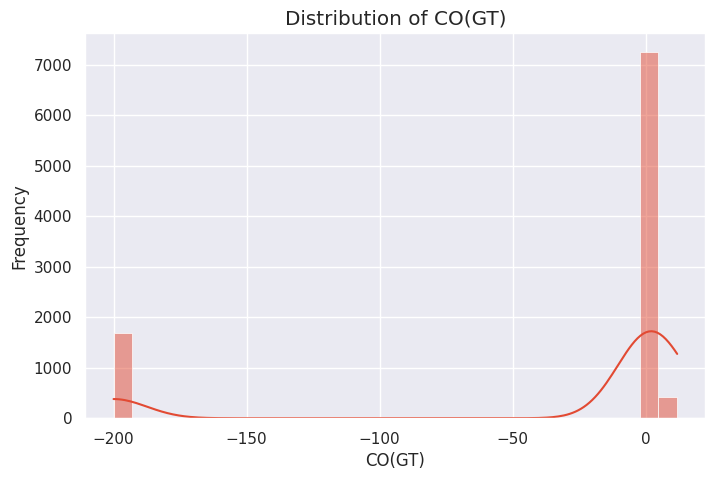

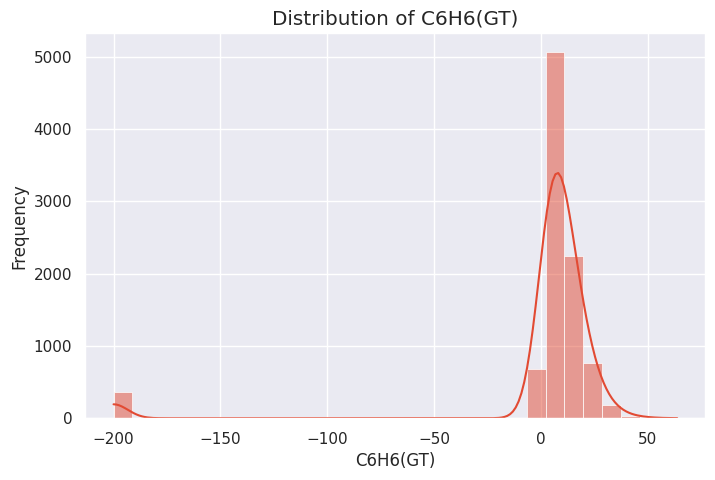

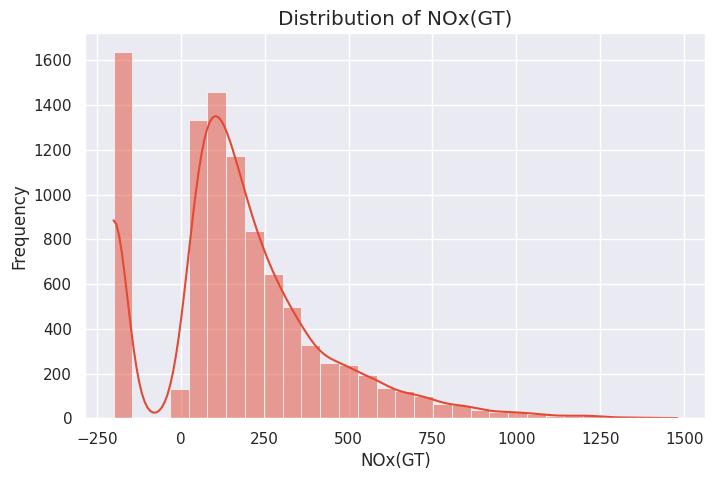

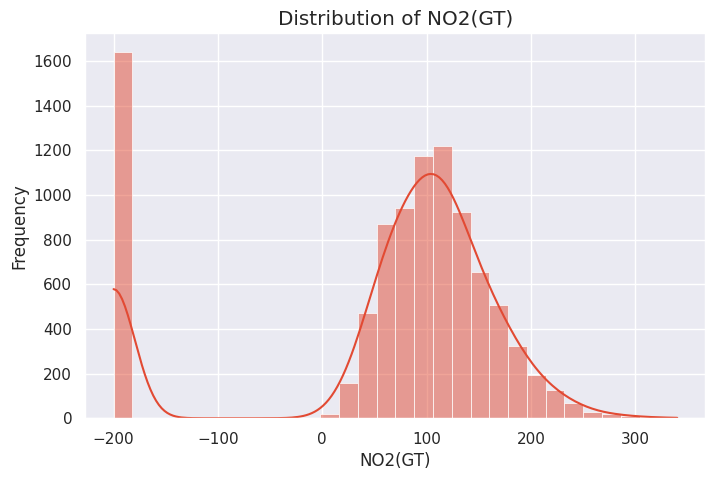

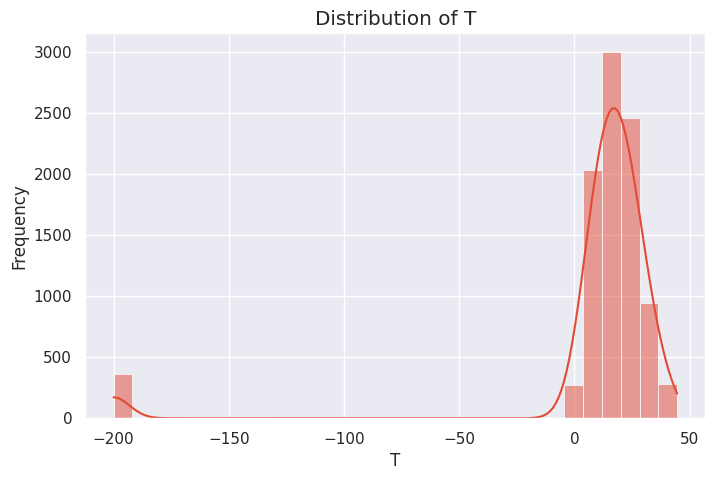

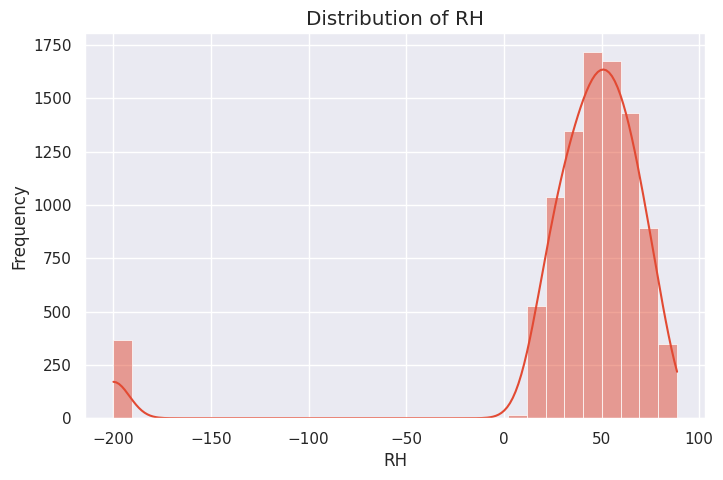

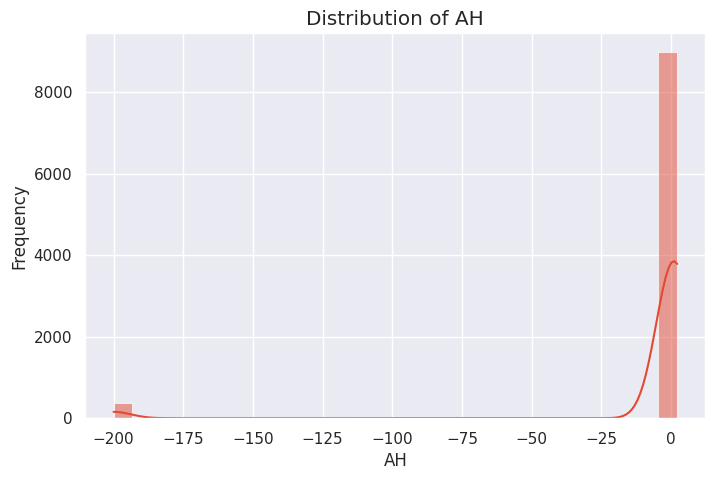

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = cleaned_data.describe()

# Distribution plots for key columns
key_columns = ["CO(GT)", "C6H6(GT)", "NOx(GT)", "NO2(GT)", "T", "RH", "AH"]

# Plot distributions
for col in key_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(cleaned_data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [22]:
# Display summary statistics
summary_stats

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


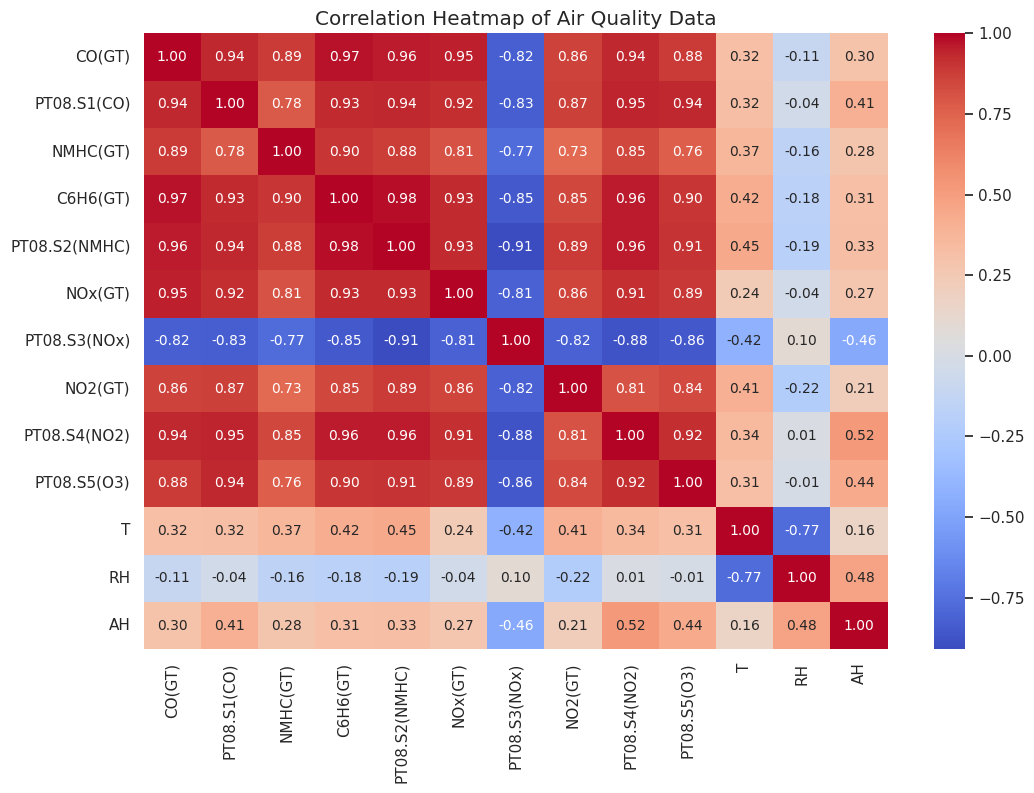

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 1230
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           827 non-null    object 
 1   Time           827 non-null    object 
 2   CO(GT)         827 non-null    float64
 3   PT08.S1(CO)    827 non-null    float64
 4   NMHC(GT)       827 non-null    float64
 5   C6H6(GT)       827 non-null    float64
 6   PT08.S2(NMHC)  827 non-null    float64
 7   NOx(GT)        827 non-null    float64
 8   PT08.S3(NOx)   827 non-null    float64
 9   NO2(GT)        827 non-null    float64
 10  PT08.S4(NO2)   827 non-null    float64
 11  PT08.S5(O3)    827 non-null    float64
 12  T              827 non-null    float64
 13  RH             827 non-null    float64
 14  AH             827 non-null    float64
dtypes: float64(13), object(2)
memory usage: 103.4+ KB


In [15]:
# Replace invalid values (-200) with NaN for processing
cleaned_data.replace(-200, float('nan'), inplace=True)

# Drop rows with NaN values after replacing invalid entries
cleaned_data = cleaned_data.dropna()

# Select only numeric columns for correlation calculation
numeric_data = cleaned_data.select_dtypes(include=['number'])

# Generate a correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()  # Calculate correlation on numeric data only
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Air Quality Data")
plt.show()

# Display the updated dataset info
cleaned_data.info()

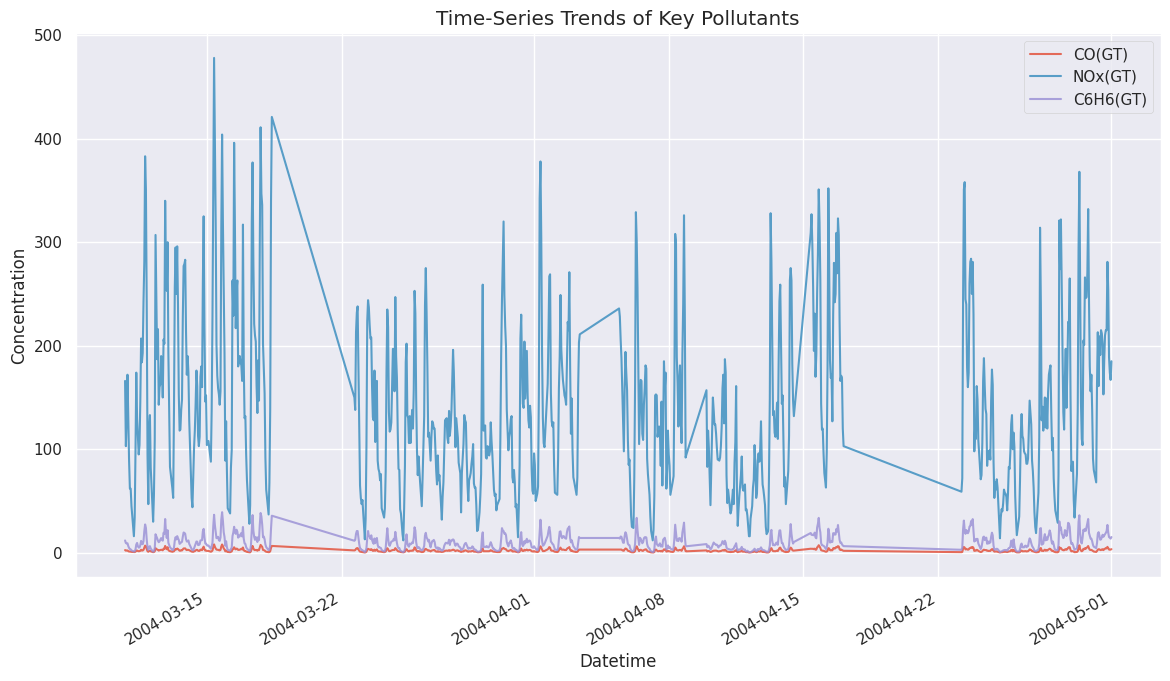

In [16]:
# Check if 'Date' and 'Time' columns exist before proceeding
if 'Date' in cleaned_data.columns and 'Time' in cleaned_data.columns:
    # Combine 'Date' and 'Time' into a single datetime column
    cleaned_data['Datetime'] = pd.to_datetime(cleaned_data['Date'] + ' ' + cleaned_data['Time'], format='%d/%m/%Y %H.%M.%S')

    # Set 'Datetime' as the index for time-series analysis
    cleaned_data.set_index('Datetime', inplace=True)

    # Drop the original 'Date' and 'Time' columns as they are now redundant
    cleaned_data = cleaned_data.drop(columns=['Date', 'Time'])
else:
    print("Warning: 'Date' or 'Time' column not found in the DataFrame. Skipping datetime combination.")


# Plot time-series data for key pollutants
key_pollutants = ["CO(GT)", "NOx(GT)", "C6H6(GT)"]
plt.figure(figsize=(14, 8))
for pollutant in key_pollutants:
    cleaned_data[pollutant].plot(label=pollutant, alpha=0.8)
plt.title("Time-Series Trends of Key Pollutants")
plt.xlabel("Datetime")
plt.ylabel("Concentration")
plt.legend()
plt.show()


In [17]:
# Display the dataset after datetime processing
cleaned_data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.60,"1,360.00",150.00,11.90,"1,046.00",166.00,"1,056.00",113.00,"1,692.00","1,268.00",13.60,48.90,0.76
2004-03-10 19:00:00,2.00,"1,292.00",112.00,9.40,955.00,103.00,"1,174.00",92.00,"1,559.00",972.00,13.30,47.70,0.73
2004-03-10 20:00:00,2.20,"1,402.00",88.00,9.00,939.00,131.00,"1,140.00",114.00,"1,555.00","1,074.00",11.90,54.00,0.75
2004-03-10 21:00:00,2.20,"1,376.00",80.00,9.20,948.00,172.00,"1,092.00",122.00,"1,584.00","1,203.00",11.00,60.00,0.79
2004-03-10 22:00:00,1.60,"1,272.00",51.00,6.50,836.00,131.00,"1,205.00",116.00,"1,490.00","1,110.00",11.20,59.60,0.79


<Figure size 1200x800 with 0 Axes>

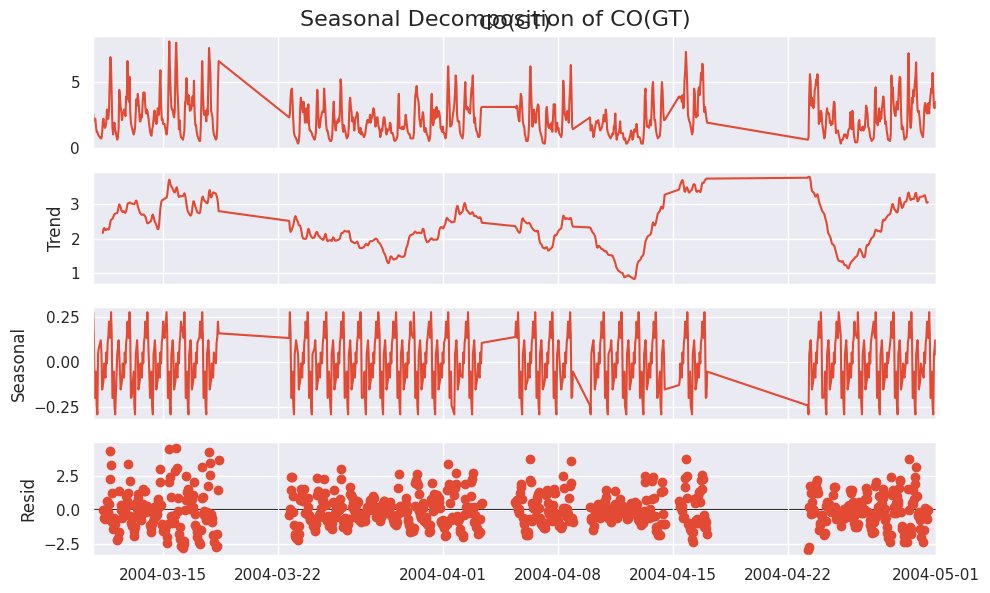

<Figure size 1200x800 with 0 Axes>

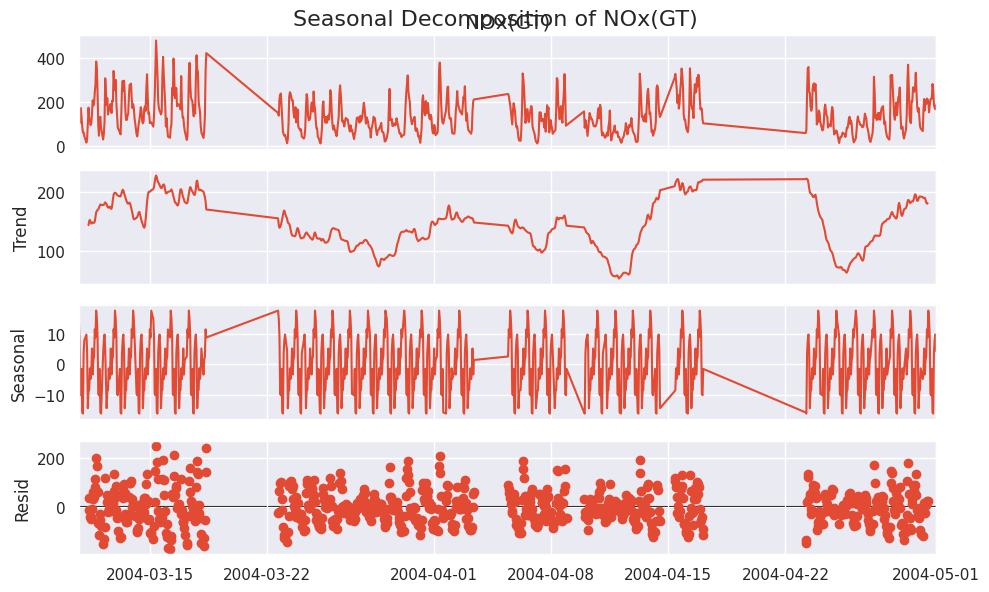

<Figure size 1200x800 with 0 Axes>

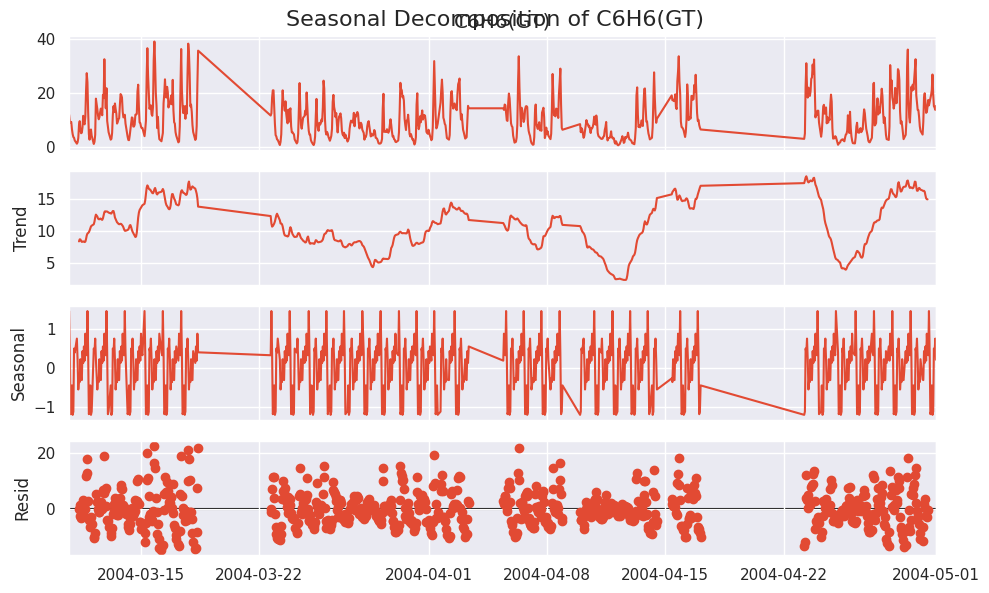

<Figure size 1200x600 with 0 Axes>

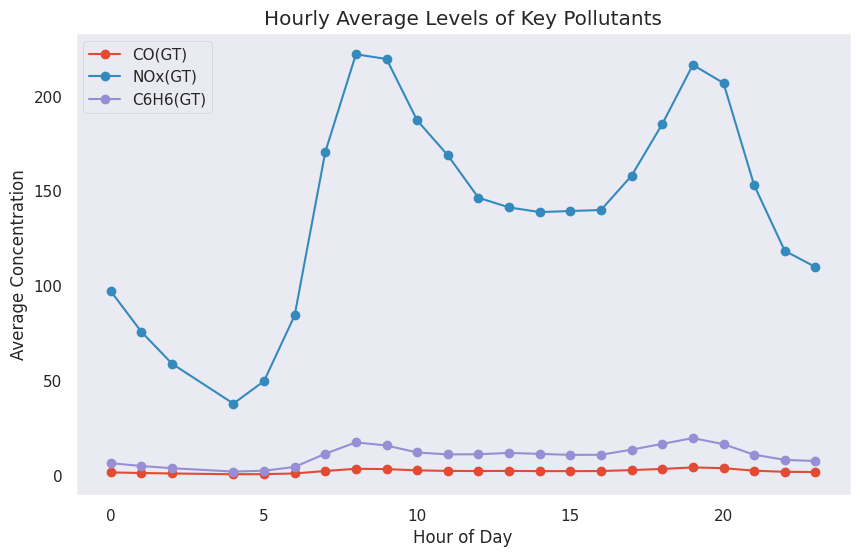

<Figure size 1200x600 with 0 Axes>

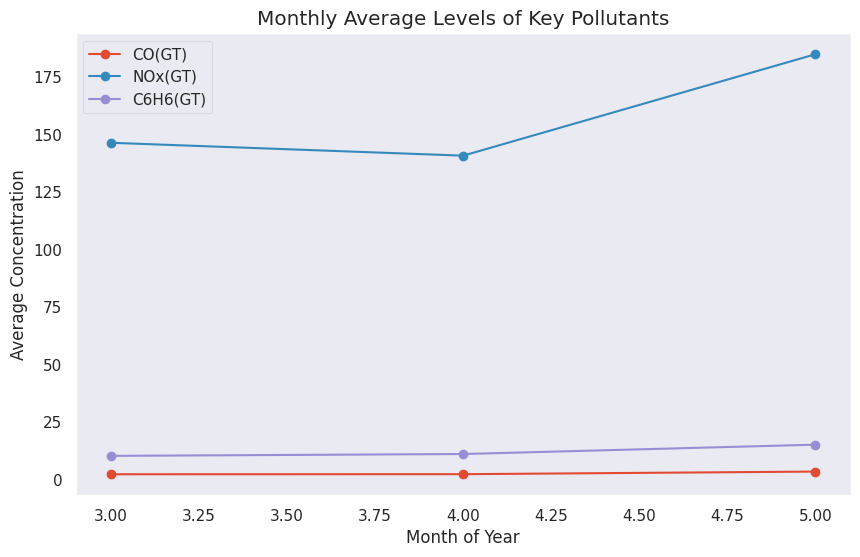

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition for key pollutants
key_pollutants = ["CO(GT)", "NOx(GT)", "C6H6(GT)"]
decomposition_results = {}

for pollutant in key_pollutants:
    # Perform decomposition with additive model
    decomposition = seasonal_decompose(cleaned_data[pollutant], model='additive', period=24)
    decomposition_results[pollutant] = decomposition

    # Plot the decomposition
    plt.figure(figsize=(12, 8))
    decomposition.plot()
    plt.suptitle(f"Seasonal Decomposition of {pollutant}", fontsize=16)
    plt.show()

# Proceed with hourly and monthly aggregation
hourly_avg = cleaned_data.groupby(cleaned_data.index.hour).mean()
monthly_avg = cleaned_data.groupby(cleaned_data.index.month).mean()

# Plot hourly and monthly trends
plt.figure(figsize=(12, 6))
hourly_avg[key_pollutants].plot(title="Hourly Average Levels of Key Pollutants", marker='o')
plt.xlabel("Hour of Day")
plt.ylabel("Average Concentration")
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
monthly_avg[key_pollutants].plot(title="Monthly Average Levels of Key Pollutants", marker='o')
plt.xlabel("Month of Year")
plt.ylabel("Average Concentration")
plt.grid()
plt.show()


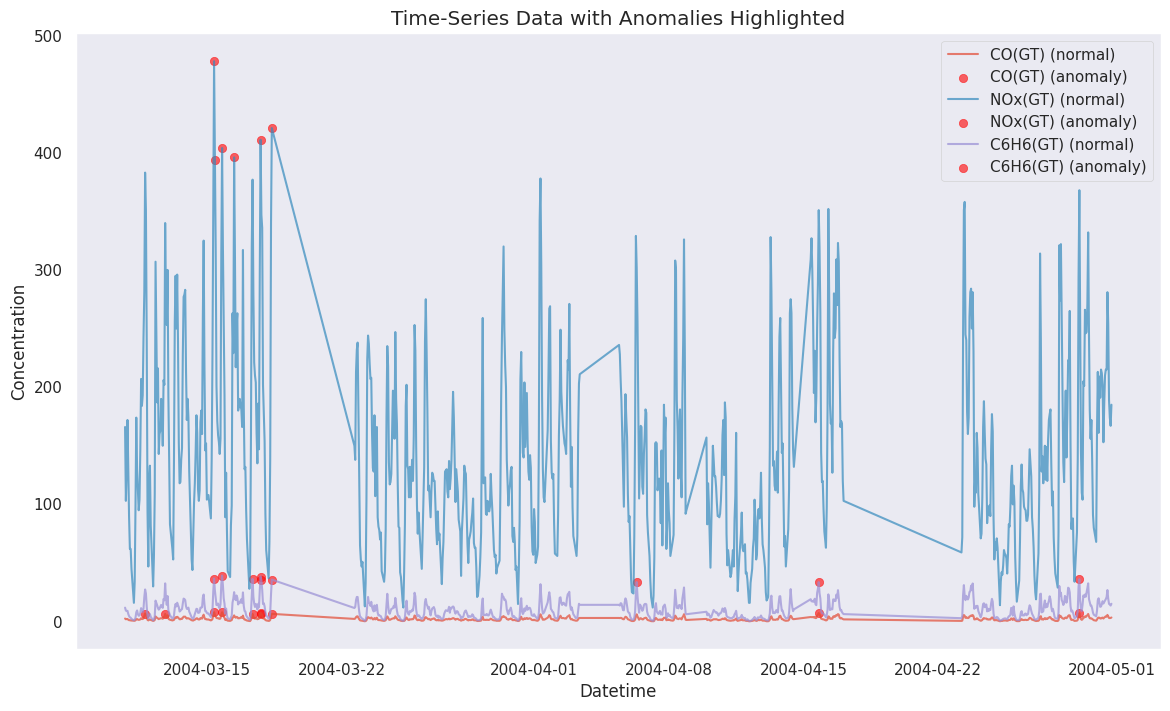

,0
CO(GT),10
NOx(GT),6
C6H6(GT),9


In [19]:
from scipy.stats import zscore

# Compute z-scores for key pollutants
key_pollutants = ["CO(GT)", "NOx(GT)", "C6H6(GT)"]
z_scores = cleaned_data[key_pollutants].apply(zscore)

# Identify anomalies (e.g., z-score > 3 or < -3)
anomalies = (z_scores > 3) | (z_scores < -3)

# Visualize anomalies on time-series plots
plt.figure(figsize=(14, 8))
for pollutant in key_pollutants:
    plt.plot(cleaned_data.index, cleaned_data[pollutant], label=f"{pollutant} (normal)", alpha=0.7)
    plt.scatter(
        cleaned_data.index[anomalies[pollutant]],
        cleaned_data[pollutant][anomalies[pollutant]],
        label=f"{pollutant} (anomaly)",
        color="red",
        alpha=0.6,
    )
plt.title("Time-Series Data with Anomalies Highlighted")
plt.xlabel("Datetime")
plt.ylabel("Concentration")
plt.legend()
plt.grid()
plt.show()

# Display counts of anomalies for each pollutant
anomaly_counts = anomalies.sum()
anomaly_counts


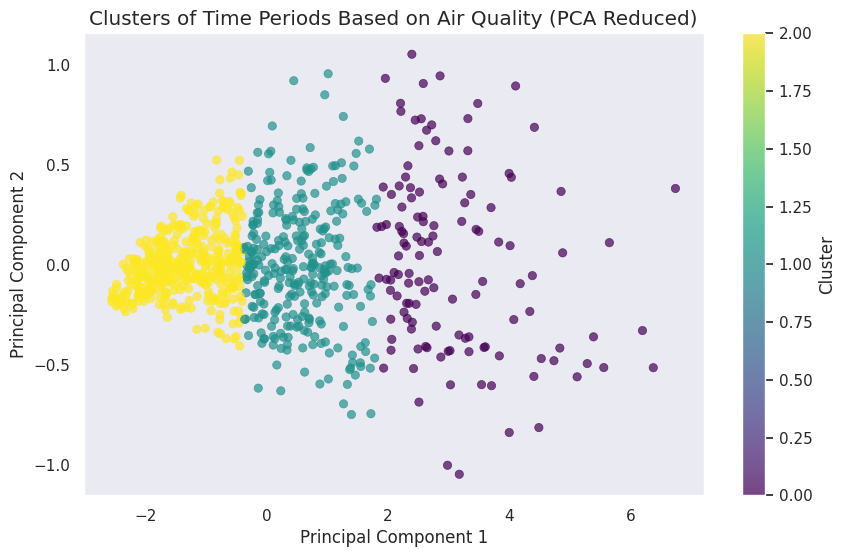

,Cluster
2,409
1,291
0,127


In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Prepare the dataset
pollutants_for_clustering = cleaned_data[key_pollutants]
scaler = StandardScaler()
normalized_data = scaler.fit_transform(pollutants_for_clustering)

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Add clusters to the dataset
cleaned_data['Cluster'] = clusters

# Step 3: Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap="viridis", alpha=0.7
)
plt.colorbar(scatter, label="Cluster")
plt.title("Clusters of Time Periods Based on Air Quality (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

# Display cluster counts
cluster_counts = cleaned_data['Cluster'].value_counts()
cluster_counts


<Figure size 1000x600 with 0 Axes>

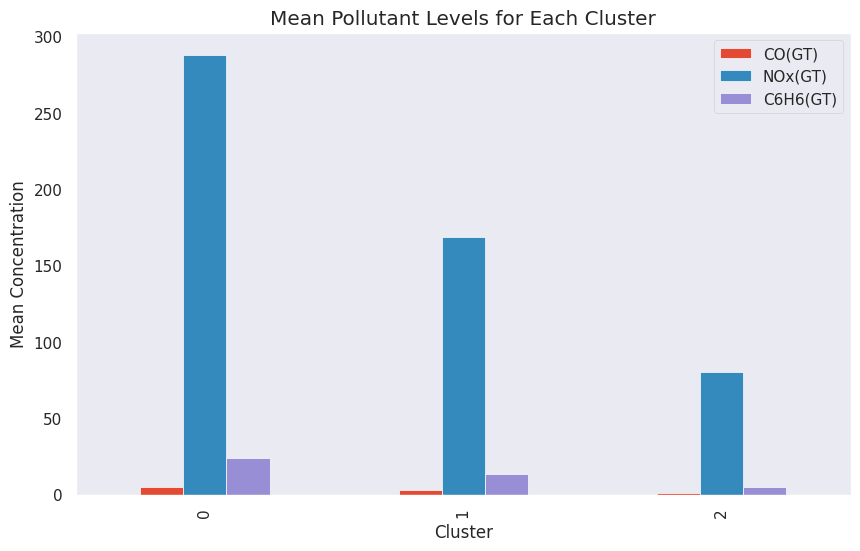

<Figure size 1000x600 with 0 Axes>

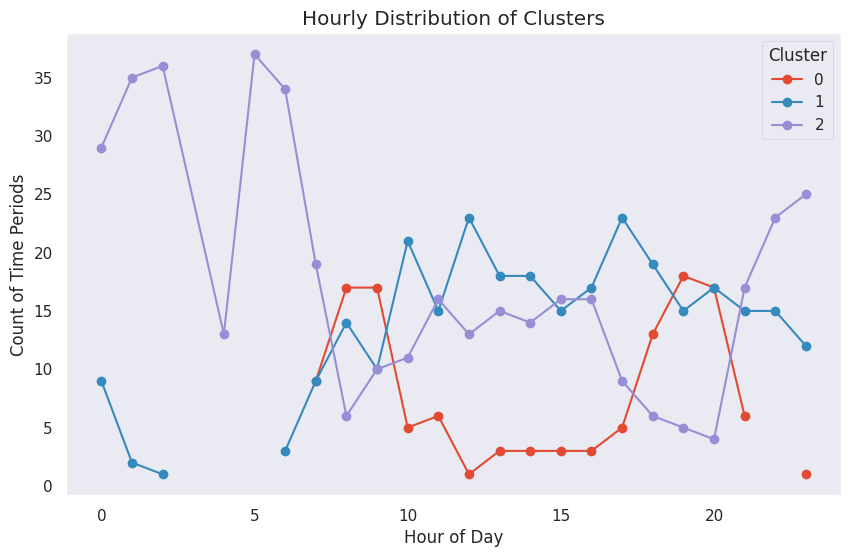

<Figure size 1000x600 with 0 Axes>

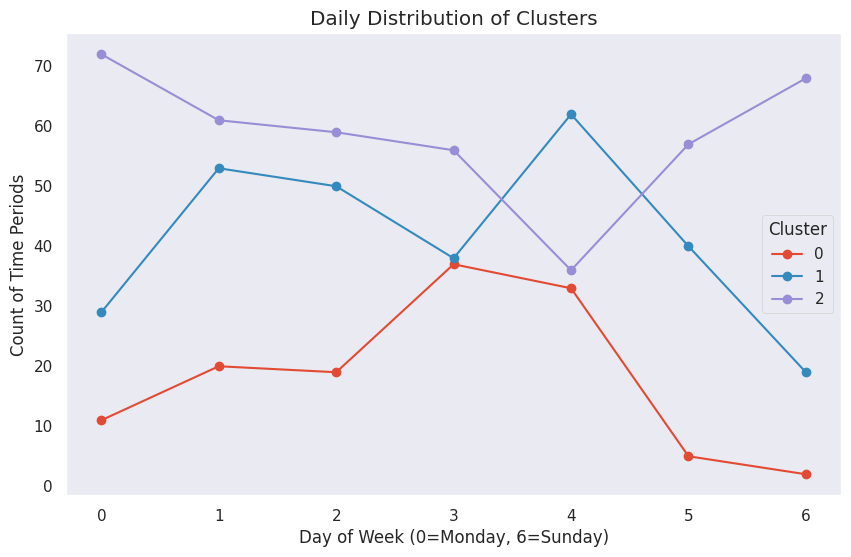

,CO(GT),NOx(GT),C6H6(GT)
Cluster,,,
0,4.91,288.28,23.74
1,2.77,169.01,13.23
2,1.26,80.40,4.99


In [21]:
# Step 1: Analyze cluster characteristics
cluster_means = cleaned_data.groupby("Cluster")[key_pollutants].mean()

# Step 2: Correlate clusters with time features
cleaned_data['Hour'] = cleaned_data.index.hour
cleaned_data['DayOfWeek'] = cleaned_data.index.dayofweek

hourly_cluster_distribution = cleaned_data.groupby(["Hour", "Cluster"]).size().unstack()
daily_cluster_distribution = cleaned_data.groupby(["DayOfWeek", "Cluster"]).size().unstack()

# Visualize cluster characteristics
plt.figure(figsize=(10, 6))
cluster_means.plot(kind="bar", figsize=(10, 6))
plt.title("Mean Pollutant Levels for Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Concentration")
plt.grid()
plt.show()

# Visualize hourly cluster distribution
plt.figure(figsize=(10, 6))
hourly_cluster_distribution.plot(kind="line", marker="o")
plt.title("Hourly Distribution of Clusters")
plt.xlabel("Hour of Day")
plt.ylabel("Count of Time Periods")
plt.grid()
plt.show()

# Visualize daily cluster distribution
plt.figure(figsize=(10, 6))
daily_cluster_distribution.plot(kind="line", marker="o")
plt.title("Daily Distribution of Clusters")
plt.xlabel("Day of Week (0=Monday, 6=Sunday)")
plt.ylabel("Count of Time Periods")
plt.grid()
plt.show()

# Display cluster means for pollutants
cluster_means


<Figure size 1000x600 with 0 Axes>

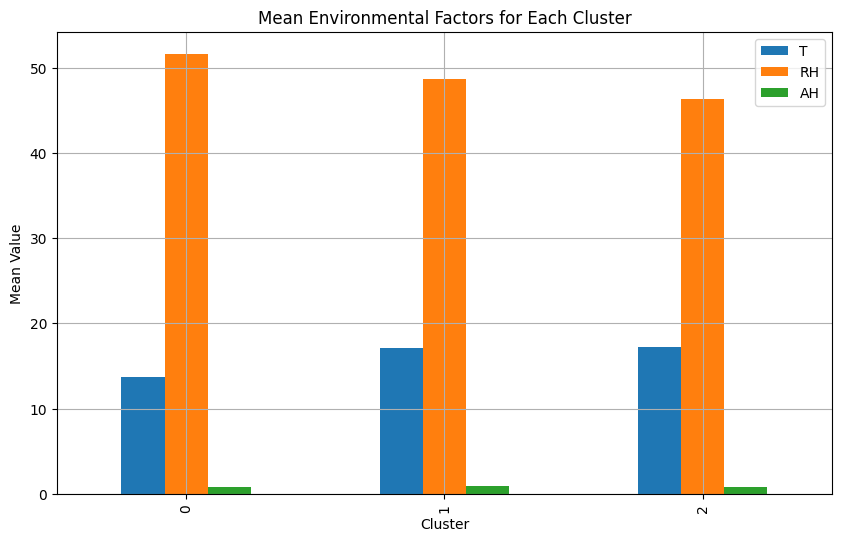

In [37]:
# Analyze environmental factors (Temperature, RH, AH) across clusters
environmental_factors = ["T", "RH", "AH"]
env_cluster_means = cleaned_data.groupby("Cluster")[environmental_factors].mean()

# Visualize environmental factors by cluster
plt.figure(figsize=(10, 6))
env_cluster_means.plot(kind="bar", figsize=(10, 6))
plt.title("Mean Environmental Factors for Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Value")
plt.grid()
plt.show()

# Examine specific periods with high pollution (Cluster 0)
high_pollution_periods = cleaned_data[cleaned_data["Cluster"] == 0]


In [38]:
# Display a summary of high pollution periods
high_pollution_summary = high_pollution_periods.describe()

env_cluster_means, high_pollution_summary

(                 T         RH        AH
 Cluster                                
 0        13.672776  51.610782  0.779925
 1        17.063704  48.649630  0.910964
 2        17.215576  46.259190  0.858597,
            CO(GT)  PT08.S1(CO)    NMHC(GT)    C6H6(GT)  PT08.S2(NMHC)  \
 count  371.000000   371.000000  371.000000  371.000000     371.000000   
 mean     1.196496  1004.385445   80.460916    4.614016     730.156334   
 std      0.432046   108.620016   45.314224    2.270842     122.780478   
 min      0.300000   753.000000    7.000000    0.500000     448.000000   
 25%      0.800000   927.000000   47.000000    2.800000     642.500000   
 50%      1.200000  1001.000000   70.000000    4.400000     735.000000   
 75%      1.500000  1072.000000  105.000000    6.350000     827.500000   
 max      2.100000  1292.000000  252.000000   10.900000    1010.000000   
 
           NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
 count  371.000000    371.000000  371.000000    371

In [39]:
!pip install autoviml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-ensemble to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6

In [2]:
!pip install scipy==1.7.3

In [3]:
from autoviml.Auto_ViML import Auto_ViML

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (661, 16)
    Training Set Memory Usage = 0.08 MB
Test Set Shape = (166, 15)
    Test Set Memory Usage = 0.02 MB
Single_Label Target: ['Cluster']

################ Multi_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
ALERT! Setting Imbalanced_Flag to True in Auto_ViML for Multi_Classification problems improves results!
       Class  -> Counts -> Percent
           0:     102  ->   15.4%
           1:     240  ->   36.3%
           2:     319  ->   48.3%
    Target Cluster is already numeric. No transformation done.
Alert! Rare Class is not 1 but 0 in this data set
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
####

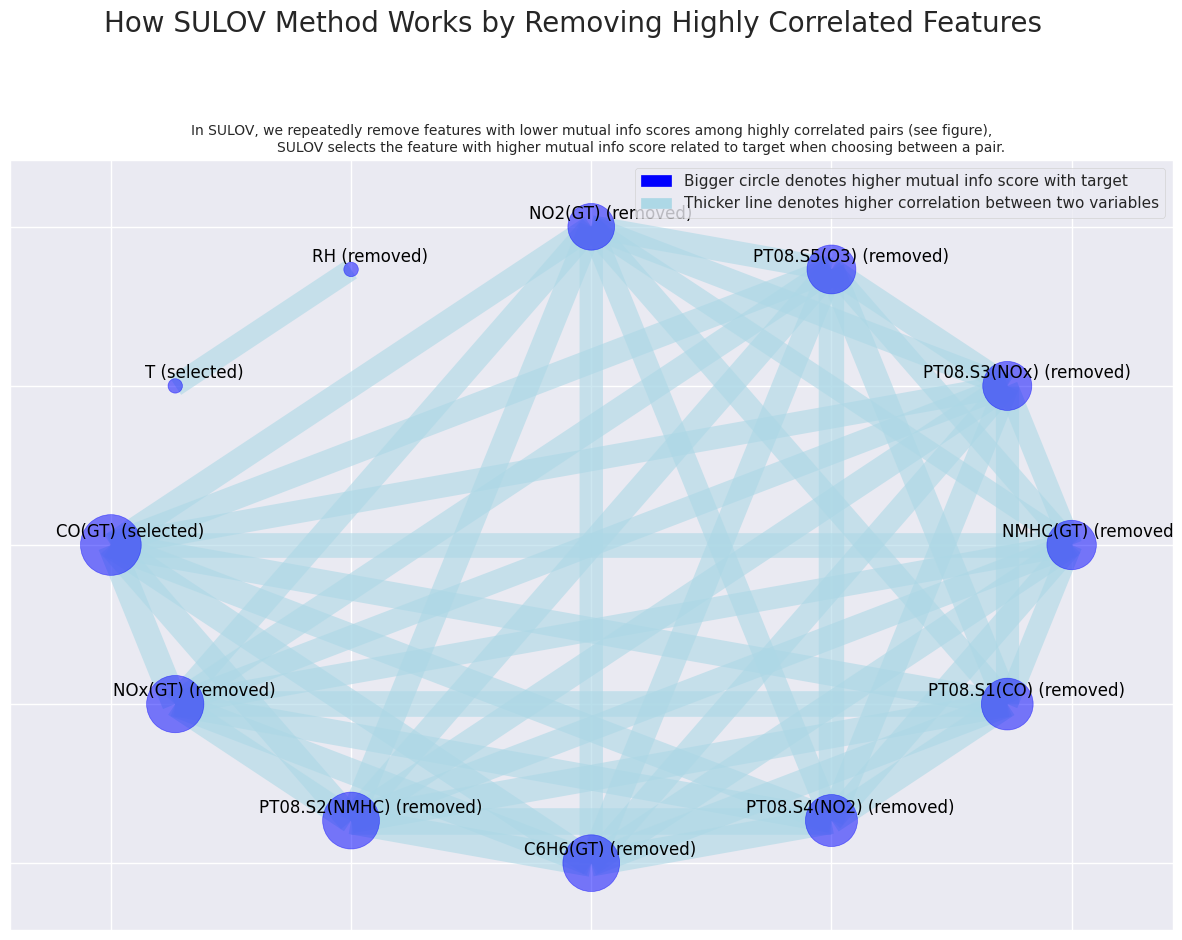

Splitting selected features into float and categorical (integer) variables:
    (3) float variables ...
    (2) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 5 
    Finding Important Features using Boosted Trees algorithm...
        using 5 variables...
        using 3 variables...
Found 5 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  594 , CV rows =  67
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling of train and validation data
###################################################################

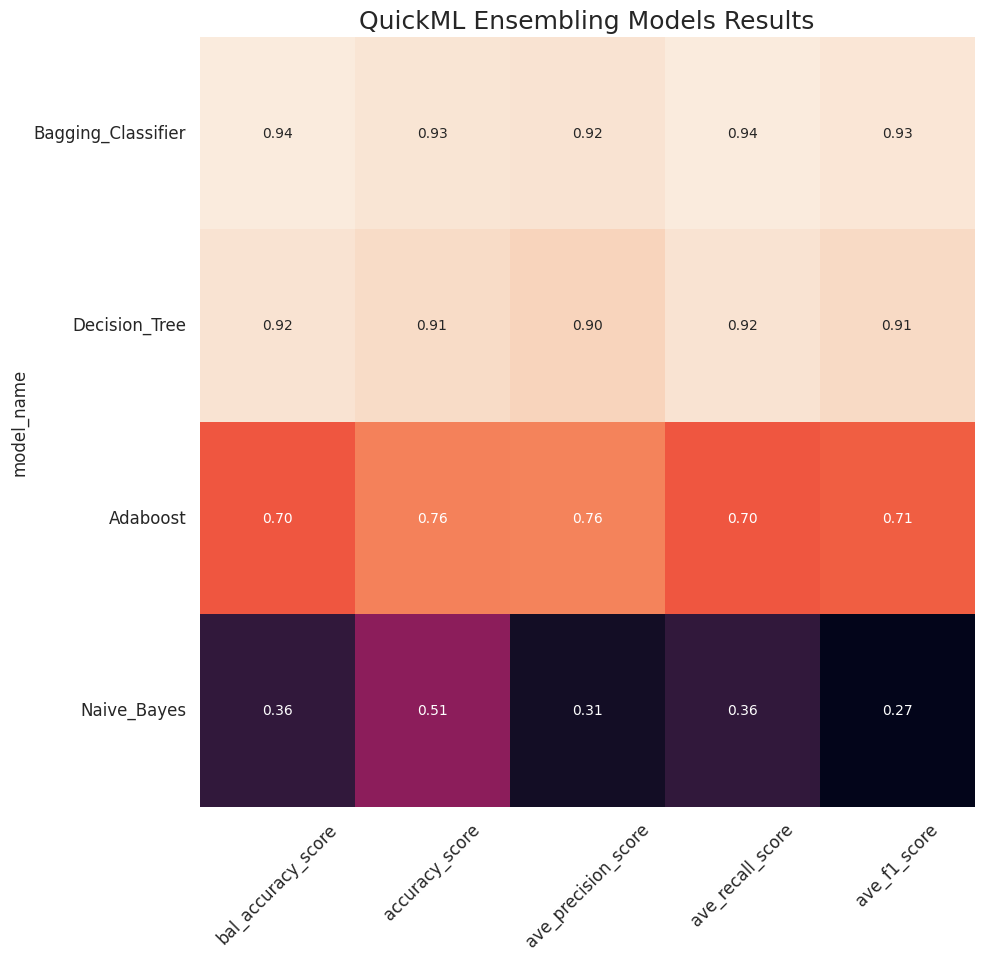

<Figure size 1500x750 with 0 Axes>

In [24]:
from sklearn.model_selection import train_test_split

# Train AutoVIML and capture all returned values in a single variable
results = Auto_ViML(
    train=train_data, target='Cluster', test=X_test, verbose=1
)

model = results[0]
features = results[1]
train_metrics = results[2]

# Display training metrics and features
print("Training Metrics:", train_metrics)
print("Selected Features:", features)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        25
           1       0.34      0.90      0.50        51
           2       0.00      0.00      0.00        90

    accuracy                           0.43       166
   macro avg       0.37      0.63      0.46       166
weighted avg       0.22      0.43      0.28       166



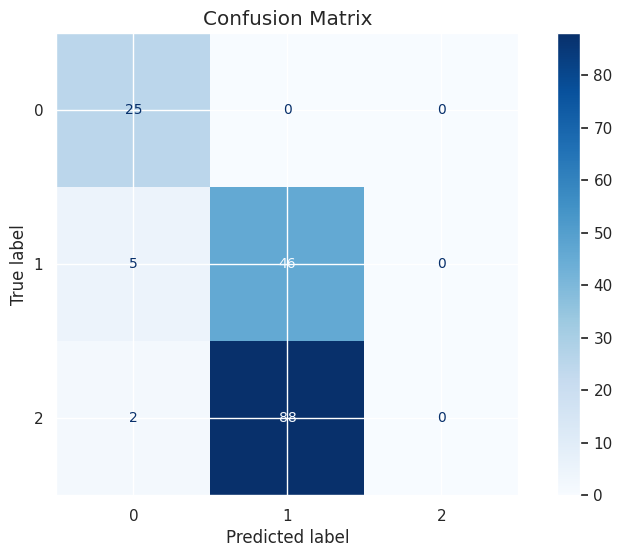

In [26]:
# Ensure X_test includes only the selected features
X_test_filtered = X_test[features]

# Make predictions on the filtered test set
y_pred = model.predict(X_test_filtered)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Feature importance analysis (if applicable)
if hasattr(model, "feature_importances_"):
    feature_importance = dict(zip(features, model.feature_importances_))
    sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    print("Feature Importances:")
    for feature, importance in sorted_importance:
        print(f"{feature}: {importance}")
